# Sloan Digital Sky Survey

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataset
df = pd.read_csv("skyserver.csv")
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [3]:
#check shape of the dataset
df.shape

(10000, 18)

There are 10,000 rows and 18 columns are present.

In [4]:
#check datatype and null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


No null value present in our dataset

<AxesSubplot:>

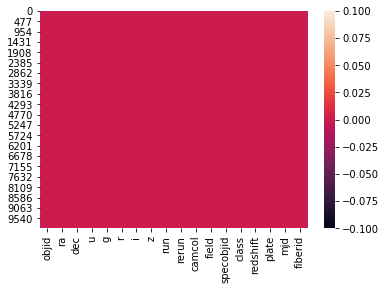

In [5]:
#check null value with heatmap
sns.heatmap(df.isnull())

We can see there is no null value present in data

In [6]:
#check unique value present in dataset
df.nunique()

objid            1
ra           10000
dec          10000
u             9730
g             9817
r             9852
i             9890
z             9896
run             23
rerun            1
camcol           6
field          703
specobjid     6349
class            3
redshift      9637
plate          487
mjd            355
fiberid        892
dtype: int64

1. objid and rerun attributes have only one unique value.
2. There is 10,000 unique values present in ra and dec columns.

In [7]:
#check unique value present in camcol column
df["camcol"].value_counts()

4    1834
5    1827
6    1769
2    1712
3    1560
1    1298
Name: camcol, dtype: int64

In [8]:
#drop objid and rerun columns because both columns have only one value and doesn't impact on our dataset.
df.drop(["objid","rerun"],axis=1,inplace=True)
#drop specobjid and fiberid columns because ID is not important to our model.
df.drop(["specobjid","fiberid"],axis=1,inplace=True)

In [9]:
df.head()

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,STAR,-0.000009,3306,54922
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,STAR,-0.000055,323,51615
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,GALAXY,0.123111,287,52023
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,STAR,-0.000111,3306,54922
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,STAR,0.000590,3306,54922


## Univariate analysis

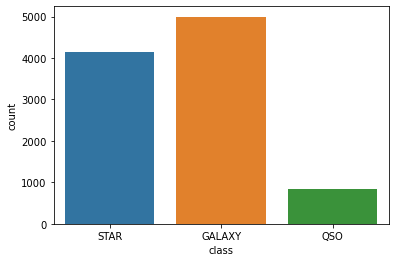

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [10]:
#check unique values of class attribute
sns.countplot(df["class"])
plt.show()

df["class"].value_counts()

Galaxy object is present in almost 50 percent of the rows,Star object is present in approx. 41 percent of the rows,while QSO object present in only 8.5 percent of the rows.

## Bivariate analysis

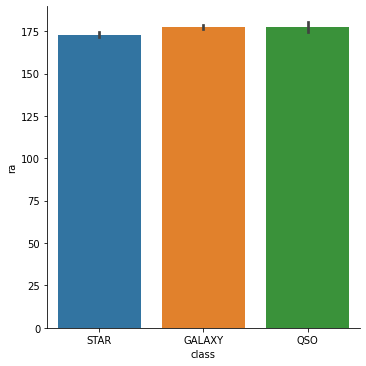

In [11]:
sns.factorplot(x="class",y="ra",data=df,kind="bar")

Right Ascension(ra) is almost same in all the three objects.

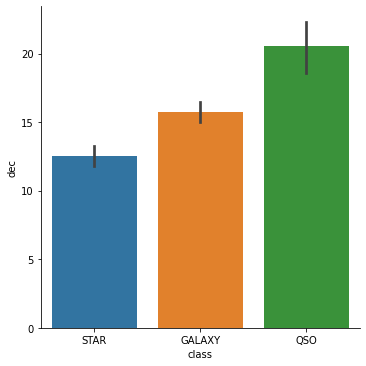

In [12]:
sns.factorplot(x="class",y="dec",data=df,kind="bar")

1. Declination(dec) is high in quasar(QSO) object compared to another two objects.
2. Declination(dec) is low in star object compared to another objcts.

<AxesSubplot:xlabel='class', ylabel='run'>

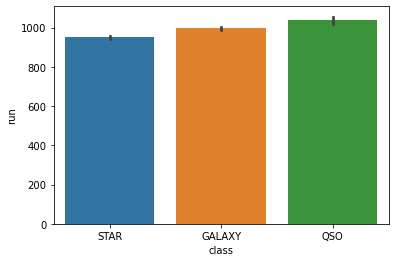

In [13]:
sns.barplot(x="class",y="run",data=df)

Run Number(run),which indicates the specific scan, is high in Quasar object,median in Galaxy object and low in Star object.But,there is not much difference between run number in terms of objects.

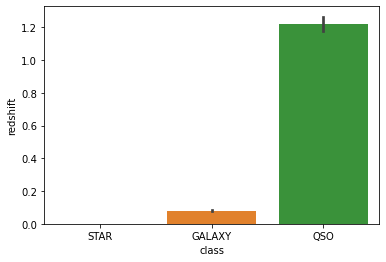

,class,redshift
0,GALAXY,0.080325
1,QSO,1.218366
2,STAR,0.000043


In [14]:
sns.barplot(x="class",y="redshift",data=df)
plt.show()

df.groupby("class")["redshift"].mean().reset_index()

Redshift is high from quasar object,while very low from star and galaxy objects.

## Multivariate analysis

<AxesSubplot:>

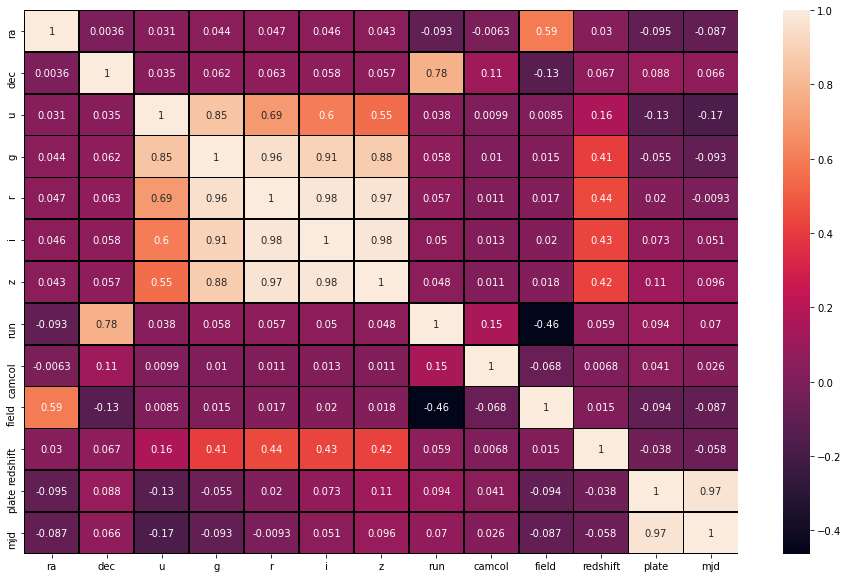

In [15]:
#check correlation using heatmap
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.7,linecolor="black")

observation:
 
1. There is high positive correlation between some useful attributes which is shown below:
-plate number(plate) and modified julian date(mjd)

-declination(dec) and run number(run)

2. There is high negative correlation between field and run. 

In [16]:
df.describe()

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,3.648700,302.380100,0.143726,1460.986400,52943.533300
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,1.666183,162.577763,0.388774,1788.778371,1511.150651
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,1.000000,11.000000,-0.004136,266.000000,51578.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,2.000000,184.000000,0.000081,301.000000,51900.000000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,4.000000,299.000000,0.042591,441.000000,51997.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,5.000000,414.000000,0.092579,2559.000000,54468.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,6.000000,768.000000,5.353854,8410.000000,57481.000000


1. There is large difference between mean and standard deviation of every columns except redshift column. It represent the skewness present in data and need to remove.
2. There is large difference between 75 percent of the data and maximum value of the data in many columns. It represent the outliers and need to remove.

In [17]:
#convert categorical data into numerical data.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["class"] = le.fit_transform(df["class"])

## Handling outliers

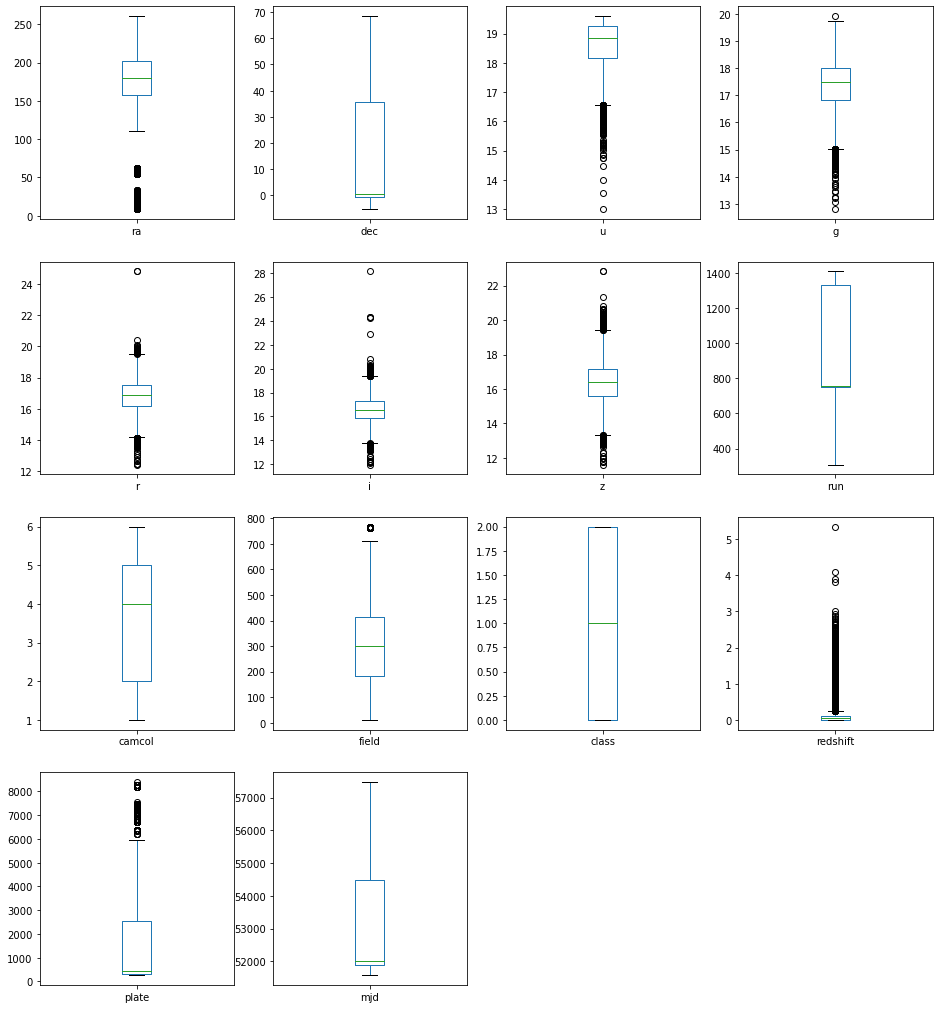

In [18]:
#check outliers through box plot.
df.plot(kind="box",layout=(4,4),figsize=(16,18),subplots=True)
plt.show()

From the above observation, there is outliers present in many attributes and need to remove it.

In [19]:
#check and remove outliers using zscore
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold=3
print(np.where(z>3))

(array([  45,  109,  129, ..., 9992, 9994, 9997], dtype=int64), array([11, 11, 11, ..., 12, 12, 12], dtype=int64))


In [20]:
df_new = df[(z<3).all(axis=1)]
df_new

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,2,-0.000009,3306,54922
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,2,-0.000055,323,51615
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,0,0.123111,287,52023
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,2,-0.000111,3306,54922
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,2,0.000590,3306,54922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,131.398915,51.533706,17.79613,16.02621,15.15955,14.71488,14.33840,1345,3,161,0,0.055515,447,51877
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,0,0.027583,447,51877
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,0,0.117772,447,51877
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,0,0.014019,447,51877


In [21]:
percentage_loss = ((10000-8713)/10000)*100
percentage_loss

12.870000000000001

For removing outliers, Percentage loss of data is high through zscore.So,we don't apply this method and try another method. 

In [22]:
#check ad remove outliers through inter qurtile range.
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ra            44.176333
dec           36.188432
u              1.081197
g              1.195045
r              1.339343
i              1.404845
z              1.523162
run          579.000000
camcol         3.000000
field        230.000000
class          2.000000
redshift       0.092498
plate       2258.000000
mjd         2568.000000
dtype: float64


In [23]:
df_new1 = df[~((df < (Q1 - 1.5 * IQR))| (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_new1)

              ra        dec         u         g         r         i         z  \
0     183.531326   0.089693  19.47406  17.04240  15.94699  15.50342  15.22531   
1     183.598371   0.135285  18.66280  17.21449  16.67637  16.48922  16.39150   
2     183.680207   0.126185  19.38298  18.19169  17.47428  17.08732  16.80125   
3     183.870529   0.049911  17.76536  16.60272  16.16116  15.98233  15.90438   
4     183.883288   0.102557  17.55025  16.26342  16.43869  16.55492  16.61326   
...          ...        ...       ...       ...       ...       ...       ...   
9993  131.398915  51.533706  17.79613  16.02621  15.15955  14.71488  14.33840   
9995  131.316413  51.539547  18.81777  17.47053  16.91508  16.68305  16.50570   
9996  131.306083  51.671341  18.27255  17.43849  17.07692  16.71661  16.69897   
9998  131.477151  51.753068  18.88287  17.91068  17.53152  17.36284  17.13988   
9999  131.665012  51.805307  19.27586  17.37829  16.30542  15.83548  15.50588   

       run  camcol  field  

Percentage loss is also high through IQR method and we don't apply this method.

## Prepare data for model training

In [24]:
#our target variable is class.so,it is classificaton problem and take class column as y variable.
x = df.drop(["class"],axis=1)
y = df["class"]

## Handling skewness

In [25]:
df.skew()

ra         -1.227350
dec         1.191544
u          -1.219795
g          -0.536293
r          -0.021673
i           0.286442
z           0.214313
run         0.412555
camcol     -0.100220
field       0.249795
class       0.169292
redshift    4.265729
plate       1.794609
mjd         1.039610
dtype: float64

Skewness is present in many attributes and need to remove.

<AxesSubplot:xlabel='ra', ylabel='Density'>

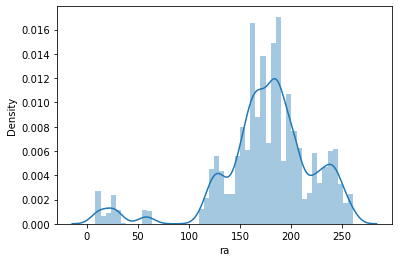

In [26]:
#check skewness through plot
sns.distplot(df["ra"])

<AxesSubplot:xlabel='dec', ylabel='Density'>

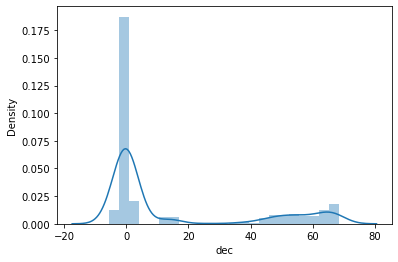

In [27]:
sns.distplot(df["dec"])

<AxesSubplot:xlabel='u', ylabel='Density'>

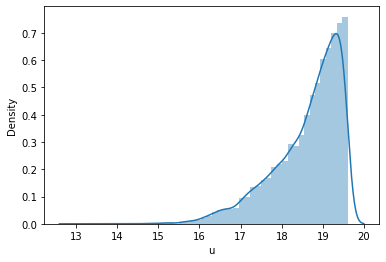

In [28]:
sns.distplot(df["u"])

<AxesSubplot:xlabel='redshift', ylabel='Density'>

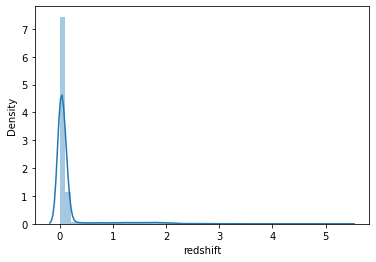

In [29]:
sns.distplot(df["redshift"])

<AxesSubplot:xlabel='plate', ylabel='Density'>

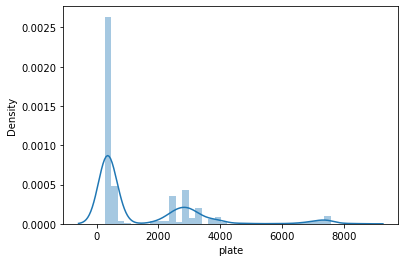

In [30]:
sns.distplot(df["plate"])

<AxesSubplot:xlabel='mjd', ylabel='Density'>

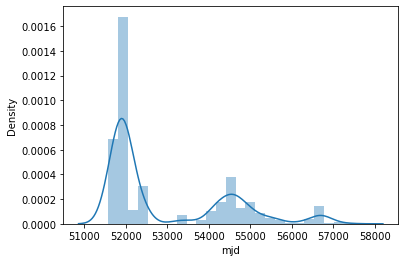

In [31]:
sns.distplot(df["mjd"])

In [32]:
#remove skewness using power_transform method
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

## Scaling data

In [33]:
#scaling data with mean=0 and unit variance using standard scaler method
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_s = sc.fit_transform(x)

In [34]:
#split train and test data.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_s,y,test_size=0.20,random_state=42,stratify=y)

## Find best model

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

model = [LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB(),SVC()]

for m in model:
    m.fit(x_train,y_train)
    train = m.score(x_train,y_train)
    predm = m.predict(x_test)
    print("Accuracy of",m,"is:")
    print("Training model accuracy is:",train)
    print("Accuracy score:",accuracy_score(y_test,predm)*100)
    print("Confusion matrix:","\n",confusion_matrix(y_test,predm))
    print("Classification report:","\n",classification_report(y_test,predm))
    print("*********************************************************************")
    print("\n")

Accuracy of LogisticRegression() is:
Training model accuracy is: 0.9875
Accuracy score: 98.65
Confusion matrix: 
 [[983   3  14]
 [ 10 160   0]
 [  0   0 830]]
Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1000
           1       0.98      0.94      0.96       170
           2       0.98      1.00      0.99       830

    accuracy                           0.99      2000
   macro avg       0.98      0.97      0.98      2000
weighted avg       0.99      0.99      0.99      2000

*********************************************************************


Accuracy of DecisionTreeClassifier() is:
Training model accuracy is: 1.0
Accuracy score: 98.5
Confusion matrix: 
 [[984  13   3]
 [ 13 157   0]
 [  1   0 829]]
Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1000
           1       0.92      0.92      0.92       170
           2  

we get good training and testing accuracy using logistic regression.

### Bagging and boosting methods

In [36]:
#check accuracy using bagging and boosting methods.
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

model = [RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier()]

for i in model:
    i.fit(x_train,y_train)
    train = i.score(x_train,y_train)
    predi = i.predict(x_test)
    print("Accuracy of",i,"is:")
    print("Training model accuracy is:",train)
    print("Accuracy score:",accuracy_score(y_test,predi)*100)
    print("Confusion matrix:","\n",confusion_matrix(y_test,predi))
    print("Classification report:","\n",classification_report(y_test,predi))
    print("*********************************************************************")
    print("\n")

Accuracy of RandomForestClassifier() is:
Training model accuracy is: 1.0
Accuracy score: 99.15
Confusion matrix: 
 [[991   3   6]
 [  8 162   0]
 [  0   0 830]]
Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           1       0.98      0.95      0.97       170
           2       0.99      1.00      1.00       830

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.99      2000
weighted avg       0.99      0.99      0.99      2000

*********************************************************************


Accuracy of AdaBoostClassifier() is:
Training model accuracy is: 0.941
Accuracy score: 93.5
Confusion matrix: 
 [[945  47   8]
 [ 75  95   0]
 [  0   0 830]]
Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      1000
           1       0.67      0.56      0.61       170
           2   

Gradiant boosting provide best training and testing accuracy. now, let's improve accuracy using hyperparameter tuning.

### Hyperparameter Tuning

In [37]:
# Check and improve accuracy using hyperparameter tuning.
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression()
parameters = {'penalty':['l1','l2','elasticnet'],'C':[0.1,0.5,1.0],'random_state':list(range(0,10)),'solver':['newton-cg','lbfgs','liblinear','sag','saga']}
clf = GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'C': 0.5, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}


In [38]:
lr = LogisticRegression(C=0.5,penalty='l1',random_state=0,solver='saga')
lr.fit(x_train,y_train)
train = lr.score(x_train,y_train)
predlr = lr.predict(x_test)
print("Training model accuracy is:",train)
print("Accuracy score:",accuracy_score(y_test,predlr)*100)
print("Confusion matrix:","\n",confusion_matrix(y_test,predlr))
print("Classification report:","\n",classification_report(y_test,predlr))

Training model accuracy is: 0.987875
Accuracy score: 98.75
Confusion matrix: 
 [[985   3  12]
 [ 10 160   0]
 [  0   0 830]]
Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1000
           1       0.98      0.94      0.96       170
           2       0.99      1.00      0.99       830

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000



In [47]:
gbc = GradientBoostingClassifier()
parameters = {'max_depth':[2,3,4],'n_estimators':[50,100,150]}
clf = GridSearchCV(gbc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'max_depth': 3, 'n_estimators': 150}


In [48]:
gbc = GradientBoostingClassifier(max_depth=3,n_estimators=150)
gbc.fit(x_train,y_train)
train = gbc.score(x_train,y_train)
predgbc = gbc.predict(x_test)
print("Training model accuracy is:",train)
print("Accuracy score:",accuracy_score(y_test,predgbc)*100)
print("Confusion matrix:","\n",confusion_matrix(y_test,predgbc))
print("Classification report:","\n",classification_report(y_test,predgbc))

Training model accuracy is: 0.9995
Accuracy score: 99.2
Confusion matrix: 
 [[995   3   2]
 [  8 162   0]
 [  1   2 827]]
Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           1       0.97      0.95      0.96       170
           2       1.00      1.00      1.00       830

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000



In [40]:
xg = XGBClassifier()
parameters = {'booster':['gbtree','gblinear','dart'],'learning_rate':[0.01,0.1,0.2],'gamma':[0.01,0.1]}
clf = GridSearchCV(xg,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

[18:25:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:26:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:26:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:26:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[18:27:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:27:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:27:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:27:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[18:27:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:27:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:27:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip 

[18:27:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:27:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:27:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { gamma } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip 

[18:28:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:28:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:28:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:28:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [41]:
xg = XGBClassifier(booster='gbtree',gamma=0.1,learning_rate=0.2)
xg.fit(x_train,y_train)
train = xg.score(x_train,y_train)
predxg = xg.predict(x_test)
print("Training model accuracy is:",train)
print("Accuracy score:",accuracy_score(y_test,predxg)*100)
print("Confusion matrix:","\n",confusion_matrix(y_test,predxg))
print("Classification report:","\n",classification_report(y_test,predxg))

[18:31:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training model accuracy is: 1.0
Accuracy score: 99.25
Confusion matrix: 
 [[995   2   3]
 [  9 161   0]
 [  1   0 829]]
Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1000
           1       0.99      0.95      0.97       170
           2       1.00      1.00      1.00       830

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [51]:
#check best model accuracy with cross validation
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(xg,x_s,y,cv=10)
print(accuracy)
print("Accuracy of model is:",accuracy.mean()*100)

[19:20:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:20:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:20:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:20:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

We get best training and testing accuracy using xgboost with gridsearchCV.

In [52]:
#save best result
df1 = pd.DataFrame(predxg)
df1.to_csv("xg_SDSS.csv")

In [54]:
#save best model
import joblib
joblib.dump(xg,"xg_SDSS.obj")

['xg_SDSS.obj']